In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.svm import SVC
import os
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [ ]:
os.listdir("/content/drive/MyDrive/data")

['Cat', 'Dog']

In [ ]:
len(os.listdir("/content/drive/MyDrive/data/Cat"))

60

In [ ]:
len(os.listdir("/content/drive/MyDrive/data/Dog"))

66

In [ ]:
datadir="/content/drive/MyDrive/data"
lst=os.listdir(datadir)
print(lst)
for i in lst:
  subpath=os.path.join(datadir,i)
  print(subpath)
  images=os.listdir(subpath)
  print(images)
  for img in images:
    imgpath=os.path.join(subpath,img)
    print(imgpath)

['Cat', 'Dog']
/content/drive/MyDrive/data/Cat
['cat.11.jpg', 'cat.1 - Copy.jpg', 'cat.10.jpg', 'cat.21.jpg', 'cat.13.jpg', 'cat.18.jpg', 'cat.16.jpg', 'cat.12.jpg', 'cat.20.jpg', 'cat.2 - Copy.jpg', 'cat.14.jpg', 'cat.17.jpg', 'cat.15.jpg', 'cat.27.jpg', 'cat.30.jpg', 'cat.3 - Copy.jpg', 'cat.31.jpg', 'cat.28.jpg', 'cat.29.jpg', 'cat.24.jpg', 'cat.46.jpg', 'cat.32.jpg', 'cat.48.jpg', 'cat.5.jpg', 'cat.44.jpg', 'cat.53.jpg', 'cat.5 - Copy.jpg', 'cat.36.jpg', 'cat.51.jpg', 'cat.4 - Copy.jpg', 'cat.40.jpg', 'cat.34.jpg', 'cat.41.jpg', 'cat.43.jpg', 'cat.35.jpg', 'cat.50.jpg', 'cat.47.jpg', 'cat.33.jpg', 'cat.37.jpg', 'cat.52.jpg', 'cat.54.jpg', 'cat.42.jpg', 'cat.49.jpg', 'cat.39.jpg', 'cat.38.jpg', 'cat.7.jpg', 'cat.9.jpg', 'cat.8.jpg', 'download.jpeg', 'download1.jpeg', 'download2.jpeg', 'download3.jpeg', 'download4.jpeg', 'download5.jpeg', 'download6.jpeg', 'download7.jpeg', 'download8.jpeg', 'images9.jpeg', 'images.jpeg', 'downloadcat.jpeg']
/content/drive/MyDrive/data/Cat/cat.11.jpg

In [ ]:
#to read an image
img=imread('/content/drive/MyDrive/data/Cat/download1.jpeg')
img

array([[[234, 234, 244],
        [234, 234, 244],
        [234, 234, 244],
        ...,
        [231, 238, 246],
        [231, 238, 246],
        [231, 238, 246]],

       [[235, 235, 245],
        [235, 235, 245],
        [235, 235, 245],
        ...,
        [231, 238, 246],
        [231, 238, 246],
        [231, 238, 246]],

       [[235, 235, 245],
        [235, 235, 245],
        [235, 235, 245],
        ...,
        [231, 238, 246],
        [231, 238, 246],
        [231, 238, 246]],

       ...,

       [[247, 248, 253],
        [247, 248, 253],
        [247, 248, 253],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[247, 248, 253],
        [247, 248, 253],
        [247, 248, 253],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[247, 248, 253],
        [247, 248, 253],
        [247, 248, 253],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]]

In [ ]:
data=[]
target=[]
Categories=["Cat","Dog"]
datadir="/content/drive/MyDrive/data"
for i in Categories:
  print("loading......",i)
  path=os.path.join(datadir,i)
  images=os.listdir(path)
  for img in images:
    imgpath=os.path.join(path,img)
    img_array=imread(imgpath)
    img_resized=resize(img_array,(150,150,3))
    data.append(img_resized.flatten())
    target.append(Categories.index(i))
    print('loaded categories',i)

loading...... Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categories Cat
loaded categor

In [ ]:
X=np.array(data)
X.shape

(126, 67500)

In [ ]:
X

array([[0.89055289, 0.91721191, 0.91082307, ..., 0.78413342, 0.84687852,
        0.94293666],
       [0.15491925, 0.17431681, 0.15926137, ..., 0.17647564, 0.13653055,
        0.10175359],
       [0.11222787, 0.12822314, 0.16337067, ..., 0.67509693, 0.65530369,
        0.01525702],
       ...,
       [0.18038763, 0.30587782, 0.21176018, ..., 0.39221861, 0.57194751,
        0.15022263],
       [0.26041131, 0.19846669, 0.16552205, ..., 0.40593565, 0.40593565,
        0.20985722],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
y=np.array(target)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


In [ ]:
X_train


array([[0.50790921, 0.57457588, 0.37065431, ..., 0.56384311, 0.5284665 ,
        0.5091062 ],
       [0.65798442, 0.65001017, 0.69002165, ..., 0.25221012, 0.28161698,
        0.12522265],
       [0.56779476, 0.74302232, 0.53662867, ..., 0.26641727, 0.1879859 ,
        0.18406433],
       ...,
       [0.02745098, 0.02745098, 0.02745098, ..., 0.09454734, 0.09786207,
        0.07844183],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.10783641, 0.07892897, 0.09623978, ..., 0.04385629, 0.04385629,
        0.03601316]])

In [ ]:
sv=SVC()
sv.fit(X_train,y_train)

SVC()

In [ ]:
y_pred=sv.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.42      0.53      0.47        15
           1       0.63      0.52      0.57        23

    accuracy                           0.53        38
   macro avg       0.53      0.53      0.52        38
weighted avg       0.55      0.53      0.53        38



In [ ]:
img=imread("/content/drive/MyDrive/images.jpeg")
img

array([[[179, 120,  44],
        [179, 120,  44],
        [178, 119,  43],
        ...,
        [147, 105,  65],
        [144, 106,  67],
        [144, 106,  67]],

       [[180, 121,  45],
        [180, 121,  45],
        [179, 120,  44],
        ...,
        [148, 106,  66],
        [145, 107,  68],
        [145, 107,  68]],

       [[182, 123,  45],
        [181, 122,  44],
        [180, 121,  43],
        ...,
        [150, 108,  66],
        [147, 110,  68],
        [147, 110,  68]],

       ...,

       [[118, 110, 107],
        [115, 108, 102],
        [110, 102,  99],
        ...,
        [171, 133,  86],
        [170, 133,  88],
        [170, 133,  88]],

       [[112, 104, 102],
        [109, 101,  98],
        [106,  98,  96],
        ...,
        [172, 133,  90],
        [172, 133,  90],
        [172, 133,  90]],

       [[112, 104, 102],
        [109, 101,  99],
        [106,  98,  96],
        ...,
        [172, 133,  90],
        [172, 133,  92],
        [172, 133,  92]]

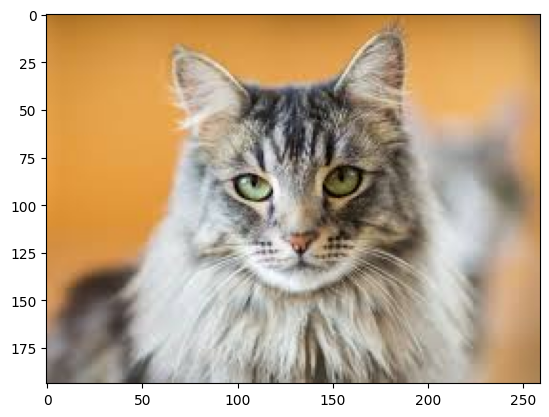

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
X.shape

(126, 67500)

In [ ]:
img1=resize(img,(150,150,3)).flatten()
img1.shape

(67500,)

In [ ]:
img1=img1.reshape(1,-1)
img1.shape

(1, 67500)

In [ ]:
y_new=sv.predict(img1)
ind=y_new.item()
print(Categories[ind])

Cat


In [ ]:
img=imread("/content/drive/MyDrive/download8.jpeg")
img

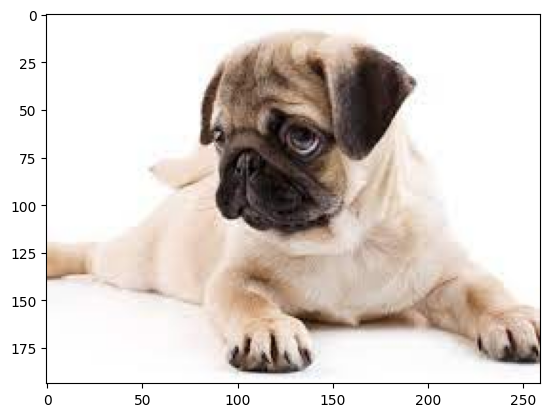

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
img1=resize(img,(150,150,3)).flatten()
img1.shape

(67500,)

In [ ]:
img1=img1.reshape(1,-1)
img1.shape

(1, 67500)

In [ ]:
y_new=sv.predict(img1)
ind=y_new.item()
print(Categories[ind])

Dog
